## Clustering - K means and Agglomerative

In [81]:
# Import important libraries
import pandas as pd
import numpy as np

In [82]:
# Path of the file
path="F:/Jitendra/IPBA/Training/Machine Learning/Clustering/house sales.csv"

In [83]:
# Import data
data=pd.read_csv(path)

In [84]:
# Checking data
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [85]:
## Let's say I am a prospective buyer and want to know the varieties of house buys and want to focus on Value for money housing
### Segments of Properties to consider buy ####
## What are the different groups of properties that exist ##
## price, bedrooms, bathrooms, sqft_living ##
## Let's say the important consideration to make a buy decision are price, sq ft, # bedrooms and # bathrooms
data_rel=data[['price','bedrooms','bathrooms','sqft_living']]

In [86]:
data_rel.head(2)

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570


In [87]:
# Checking for nulls
data_rel.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
dtype: int64

In [88]:
# Check shape of the data
data_rel.shape

(21613, 4)

In [89]:
#### How to do kmeans clustering ####
## STEP 1 - scale the data ##
## Import preprocessing library
from sklearn import preprocessing

In [90]:
# Use standard scaler class of preprocessing class to standardize the continous variables
scaler=preprocessing.StandardScaler()

In [91]:
# Fit transform the standard scaler on relevant data in one go
# All variables get transformed in one go and final output is an array
data_scaled=scaler.fit_transform(data_rel)

In [92]:
# Check scaled data
data_scaled

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732]])

In [93]:
## STEP 2- Create the clusters
# Import cluster class from sklearn
import sklearn.cluster as cluster

## ----------------- K Means Clustering------------------------

In [94]:
# Create mod object of type KMeans (lets say we stat with 3 clusters)
mod=cluster.KMeans(n_clusters=3)

In [95]:
# Fit the model
mod=mod.fit(data_scaled)

In [96]:
mod.labels_ ### cluster groups

array([1, 0, 1, ..., 1, 0, 1])

In [97]:
# Add the cluster lable column in the data rel dataframe
data_rel['labels_3']=mod.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
# Check data
data_rel.head(10) ### 

,price,bedrooms,bathrooms,sqft_living,labels_3
0,221900.0,3,1.00,1180,1
1,538000.0,3,2.25,2570,0
2,180000.0,2,1.00,770,1
3,604000.0,4,3.00,1960,0
4,510000.0,3,2.00,1680,1
5,1225000.0,4,4.50,5420,2
6,257500.0,3,2.25,1715,1
7,291850.0,3,1.50,1060,1
8,229500.0,3,1.00,1780,1
9,323000.0,3,2.50,1890,0


In [99]:
# Check # of data points in each cluster
data_rel['labels_3'].value_counts()

0    10622
1     8748
2     2243
Name: labels_3, dtype: int64

In [ ]:
#### How do I decide the number of clusters to look at ####

In [ ]:
### How many groups I should be looking at ####
## Real estate developer, who wanted to start making properties in this city,
## Context is very important, create very rigid rules while talking about the context
## Mathematical rule to decide the number of segments,
## Mathematical rules of thumb, that can help you decide the number of clusters

In [ ]:
### Choice of cluster is guided by context and business problem

In [ ]:
## Mathematical rule of thumb, 

In [100]:
# Checking the compactness of cluster model with 3 clusters
mod.inertia_ ###(WSS1+WSS2+WSS3)

39577.71845632464

In [101]:
# Let us try to create elbow curve
# Create an empty list of compactness measures which is used to append compactness values...
#...as # of cluster increase in the for loop
compactness=[]

# Let's say I want to go in the range from 2 to 20 clusters
cls= range(2,21,1)  # [2,3,4,5,....20]
print(cls)

range(2, 21)


In [102]:
# Loop over to get compactness measures
for i in cls:
    mod=cluster.KMeans(n_clusters=i)
    mod=mod.fit(data_scaled)
    compactness.append(mod.inertia_)
    print ("Cluster #", i, "compactness is = ", mod.inertia_ )

Cluster # 2 compactness is =  52448.08539764413
Cluster # 3 compactness is =  39579.59881291345
Cluster # 4 compactness is =  33318.329890186535
Cluster # 5 compactness is =  28928.484795314882
Cluster # 6 compactness is =  26256.245925458872
Cluster # 7 compactness is =  24146.00580779852
Cluster # 8 compactness is =  22135.608892526132
Cluster # 9 compactness is =  20839.068044292788
Cluster # 10 compactness is =  19607.94939586756
Cluster # 11 compactness is =  18594.87220920196
Cluster # 12 compactness is =  17616.209569677867
Cluster # 13 compactness is =  16720.41413543378
Cluster # 14 compactness is =  15867.98690003718
Cluster # 15 compactness is =  15344.533889360679
Cluster # 16 compactness is =  14421.380968564546
Cluster # 17 compactness is =  13837.525558397734
Cluster # 18 compactness is =  13277.48586144216
Cluster # 19 compactness is =  12931.868322172932
Cluster # 20 compactness is =  12644.603395504111


In [103]:
# Import plotting library
import matplotlib.pyplot as plt
%matplotlib inline

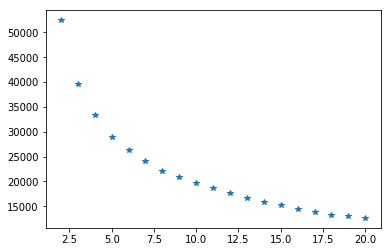

In [104]:
# Plot a scatter plot to create elbow curve with # of clusters on x axis and compactness on y axis
plt.plot(cls,compactness,"*")

In [ ]:
### k = think about the context and then arrive at the value of k
### build a scree plot , range of values you can try (5 to 10)
### What will I analyse when I analysing different clusters?

In [ ]:
# Let's create 3 clusters
mod3=cluster.KMeans(n_clusters=3)
mod3=mod3.fit(data_scaled)

In [105]:
# Below functions help you get the profiles of the clusters
# Fun 1- gives z values of profiles
def get_zprofiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile=data.groupby('Labels').mean().subtract(data.drop('Labels',axis=1).mean(),axis=1)
    profile=profile.divide(data.drop('Labels',axis=1).std(),axis=1)
    profile['Size']=data['Labels'].value_counts()
    return profile

# Fun 2 - give % difference from mean of the population
def get_profiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile=data.groupby('Labels').mean().divide(data.drop('Labels',axis=1).mean(),axis=1)
    profile['Size']=data['Labels'].value_counts()
    return profile

In [106]:
data_rel.head(2)

,price,bedrooms,bathrooms,sqft_living,labels_3
0,221900.0,3,1.00,1180,1
1,538000.0,3,2.25,2570,0


In [107]:
get_zprofiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod3)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,-0.033325,0.356361,0.370592,0.227088,10661
1,-0.464863,-0.727264,-0.867055,-0.792844,8653
2,1.904193,1.084754,1.544909,1.931056,2299


In [ ]:
### Cluster 0:  Only price is low rest is high
### Cluster 1: Price is low, bedrooms are also low, washrooms are also low 
### Cluster 2: Price very high and so is the sq ft

In [108]:
# Get profiles in terms of % of overall
get_profiles(data_rel.drop("labels_3",axis=1),mod3)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.977347,1.098325,1.134964,1.100277,10661
1,0.684007,0.799338,0.684232,0.649896,8653
2,2.294383,1.299299,1.562633,1.852714,2299


In [ ]:
### Cluster 1: Price is 32% lower than average, Number of bedrooms are 20% low

In [ ]:
# Let's check for 5 clusters
mod5=cluster.KMeans(n_clusters=5)
mod5=mod5.fit(data_scaled)

In [ ]:
get_zprofiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod5)

In [ ]:
get_profiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod5)

In [ ]:
# 6 clusters
mod6=cluster.KMeans(n_clusters=6)
mod6=mod6.fit(data_scaled)

In [ ]:
get_zprofiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod6)

In [ ]:
get_profiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod6)

In [ ]:
# 8 clusters
mod8=cluster.KMeans(n_clusters=8)
mod8=mod8.fit(data_scaled)

In [ ]:
get_zprofiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod8)

In [ ]:
get_profiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod8)

## --------------------Agglomerative Clustering ---------------------

In [ ]:
# This is very expensive algorithm and works on small data

In [ ]:
# Let's say I want to do agglomerative cluetsring on all the houses built after the year 2012

In [ ]:
# Filter relevant data
data_rel=data.loc[data['yr_built'] > 2012,['price','bedrooms','bathrooms','sqft_living']]
data_rel.head()

In [ ]:
# Shape of data
data_rel.shape

In [ ]:
#### How to do kmeans clustering ####
## STEP 1 - scale the data ##
## Import preprocessing library
from sklearn import preprocessing

# Use standard scaler class of preprocessing class to standardize the continous variables
scaler=preprocessing.StandardScaler()

# Fit transform the standard scaler on relevant data in one go
# All variables get transformed in one go and final output is an array
data_scaled=scaler.fit_transform(data_rel)

# Check scaled data
data_scaled

In [ ]:
# Create mod object of type KMeans (lets say we stat with 3 clusters)
mod=cluster.AgglomerativeClustering(n_clusters=3)

# Fit the model
mod=mod.fit(data_scaled)

In [ ]:
mod.labels_ ### cluster groups

# Add the cluster lable column in the data rel dataframe
data_rel['labels_3']=mod.labels_

In [ ]:
# Check data
data_rel.head(2) ### 

In [ ]:
# Check # of data points in each cluster
data_rel['labels_3'].value_counts()

In [ ]:
# Get z profiles
get_zprofiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod)

In [ ]:
# Cluster 0: High Price, High configurations
# Cluster 1: Low price, Low configurations
# Cluster 2: Moderately lower price with relatively higher configurations (Value for money houses)

In [ ]:
# Get % profiles
get_profiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod)

In [ ]:
# Cluster 0: 83% High Price, with 21% higer # beds and 48% larger sqft (Premium houses)
# Cluster 1: 25% Low price, with approx 15-30% Lower configurations
# Cluster 2: Moderately lower price (12% lower than average) with relatively higher configs(5-10%) (Value for money houses)

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(18, 10))
plt.title("House Dendrograms")
dend = shc.dendrogram(shc.linkage(data_rel, method='ward'))

In [ ]:
# Create mod object of type KMeans (lets say we stat with 3 clusters)
mod=cluster.AgglomerativeClustering(n_clusters=4)

# Fit the model
mod=mod.fit(data_scaled)

In [ ]:
mod.labels_ ### cluster groups

# Add the cluster lable column in the data rel dataframe
data_rel['labels_3']=mod.labels_

In [ ]:
# Check data
data_rel.head(2) ### 

In [ ]:
# Check # of data points in each cluster
data_rel['labels_3'].value_counts()

In [ ]:
# Get z profiles
get_zprofiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod)

In [ ]:
# Get % profiles
get_profiles(data=data_rel.drop("labels_3",axis=1),kmeans=mod)

In [ ]:
# Cluster 0: 25% low price with 25-30% lower config
# Cluster 1: 49% High price, with approx 20-40% higher configurations
# Cluster 2: Moderately lower price (12% lower than average) with relatively higher configs(5-10%) (Value for money houses)
# Cluster 3: 195% High Price, with 18% higer # beds and 70% larger sqft (Luxury houses in maybe posh localities)